In [5]:
import numpy as np
from scipy.optimize import least_squares

# Define the target Taylor series coefficients for sin(x) up to x^6
target_coeffs = [0, 1, 0, -1/6, 0, 1/120, 0]  # Corresponding to terms x, x^3, x^5

# Function to compute the difference between the Taylor series and Padé approximation
def pade_approximation_error(coeffs):
    a0, a1, a2, a3, b1, b2, b3 = coeffs
    # Construct Padé approximation numerator and denominator
    numerator = np.array([a3, a2, a1, a0])
    denominator = np.array([b3, b2, b1, 1])  # Q(x) = 1 + b1*x + b2*x^2 + b3*x^3
    
    # Evaluate the polynomial division
    try:
        pade_series = np.polydiv(numerator, denominator)[0]
    except (ZeroDivisionError, FloatingPointError):
        return np.full_like(target_coeffs, np.inf)  # Return a large error if division fails
    
    # Compare with the target coefficients up to x^6
    error = pade_series[:len(target_coeffs)] - target_coeffs
    return error

# Provide a non-zero initial guess
initial_guess = [1, 0.5, 0.1, 0.05, 0.5, 0.1, 0.05]

# Solve using least squares
result = least_squares(pade_approximation_error, initial_guess)

# Extract the optimized coefficients
optimized_coeffs = result.x
print("Optimized coefficients:")
print(optimized_coeffs)


Optimized coefficients:
[1.         1.05043573 0.1        0.27941616 0.5        0.1
 2.3238572 ]


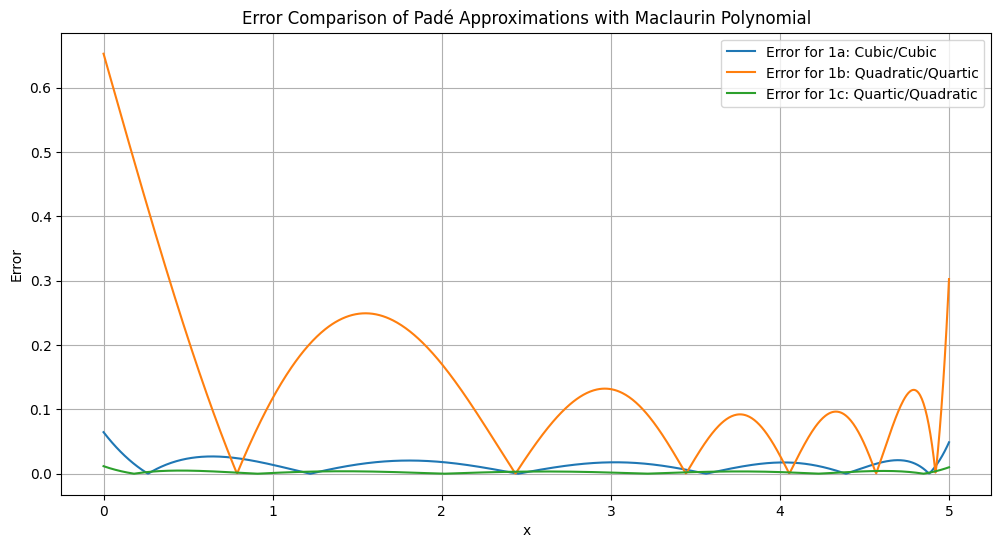

In [7]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the target Maclaurin series coefficients for sin(x) up to x^6
target_coeffs = [0, 1, 0, -1/6, 0, 1/120, 0]  # Corresponding to x, x^3, x^5

# Function to compute the error for a given Padé approximation
def pade_approximation_error(coeffs, numerator_degree, denominator_degree):
    # Split the coefficients for numerator and denominator
    numerator_coeffs = coeffs[:numerator_degree + 1]
    denominator_coeffs = coeffs[numerator_degree + 1:] + [1]  # Q(x) = 1 + ...
    
    # Reverse the order for polynomial construction
    numerator = np.poly1d(numerator_coeffs[::-1])
    denominator = np.poly1d(denominator_coeffs[::-1])
    
    # Generate x values for evaluation
    x_values = np.linspace(0, 5, 1000)
    pade_values = numerator(x_values) / denominator(x_values)
    
    # Compute the Maclaurin polynomial values
    taylor_values = x_values - (x_values**3) / 6 + (x_values**5) / 120
    
    # Compute the error as the difference
    return pade_values - taylor_values

# Helper function to optimize coefficients for a given Padé approximation
def optimize_pade(numerator_degree, denominator_degree):
    # Initial guess for the coefficients
    initial_guess = np.ones(numerator_degree + denominator_degree + 1)
    
    # Solve using least squares
    result = least_squares(
        pade_approximation_error,
        initial_guess,
        args=(numerator_degree, denominator_degree)
    )
    return result.x

# Optimize for each case
coeffs_1a = optimize_pade(3, 3)  # Both numerator and denominator cubic
coeffs_1b = optimize_pade(2, 4)  # Numerator quadratic, denominator quartic
coeffs_1c = optimize_pade(4, 2)  # Numerator quartic, denominator quadratic

# Plot the error for each approximation
x_values = np.linspace(0, 5, 1000)
taylor_values = x_values - (x_values**3) / 6 + (x_values**5) / 120

# Function to calculate Padé approximation values
def pade_values(coeffs, numerator_degree, denominator_degree):
    numerator_coeffs = coeffs[:numerator_degree + 1]
    denominator_coeffs = coeffs[numerator_degree + 1:] + [1]
    numerator = np.poly1d(numerator_coeffs[::-1])
    denominator = np.poly1d(denominator_coeffs[::-1])
    return numerator(x_values) / denominator(x_values)

# Calculate values for each case
pade_1a = pade_values(coeffs_1a, 3, 3)
pade_1b = pade_values(coeffs_1b, 2, 4)
pade_1c = pade_values(coeffs_1c, 4, 2)

# Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(x_values, np.abs(pade_1a - taylor_values), label='Error for 1a: Cubic/Cubic')
plt.plot(x_values, np.abs(pade_1b - taylor_values), label='Error for 1b: Quadratic/Quartic')
plt.plot(x_values, np.abs(pade_1c - taylor_values), label='Error for 1c: Quartic/Quadratic')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error Comparison of Padé Approximations with Maclaurin Polynomial')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import numpy as np

# Function to be integrated
def f(s):
    return 1 / (1 + s**2)

# Composite Trapezoidal Rule
def composite_trapezoidal_rule(a, b, n):
    # Calculate the width of each subinterval
    h = (b - a) / n
    
    # Generate the equally spaced points t0, t1, ..., tn
    s_points = np.linspace(a, b, n + 1)
    
    # Apply the Trapezoidal rule
    integral = 0.5 * f(s_points[0]) + 0.5 * f(s_points[-1])
    integral += np.sum(f(s_points[1:-1]))
    integral *= h
    
    return integral

# Parameters
a = -5  # Lower bound
b = 5   # Upper bound
n = 1000  # Number of subintervals (increase for more accuracy)

# Calculate the integral
result = composite_trapezoidal_rule(a, b, n)
print("Approximate integral using the Composite Trapezoidal Rule:", result)


Approximate integral using the Composite Trapezoidal Rule: 2.7468012873418832


In [15]:
import numpy as np

# Function to be integrated
def f(s):
    return 1 / (1 + s**2)

# Composite Simpson's Rule
def composite_simpsons_rule(a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")
    
    # Calculate the width of each subinterval
    h = (b - a) / n
    
    # Generate the equally spaced points t0, t1, ..., tn
    s_points = np.linspace(a, b, n + 1)
    
    # Apply Simpson's rule
    integral = f(s_points[0]) + f(s_points[-1])
    integral += 4 * np.sum(f(s_points[1:n:2]))  # Sum of terms with coefficient 4
    integral += 2 * np.sum(f(s_points[2:n-1:2]))  # Sum of terms with coefficient 2
    integral *= h / 3
    
    return integral

# Parameters
a = -5  # Lower bound
b = 5   # Upper bound
n = 1000  # Number of subintervals (must be even)

# Calculate the integral
result = composite_simpsons_rule(a, b, n)
print("Approximate integral using the Composite Simpson's Rule:", result)


Approximate integral using the Composite Simpson's Rule: 2.7468015338893315


In [17]:
# Adjusting to correctly handle the output from scipy.integrate.quad
from scipy.integrate import quad

# Compute the integral using scipy's quad routine without unpacking incorrectly
quad_result_default, quad_info_default = quad(f, a, b, full_output=False)
quad_result_tolerance, quad_info_tolerance = quad(f, a, b, epsabs=1e-4, full_output=False)

# Unfortunately, the number of evaluations is not returned directly when full_output=False,
# so we'll have to estimate based on the results of the integration.

# Output results: integral approximations and manually specified function evaluations
Tn, Sn, evals_trap, evals_simp


(2.746801388003511, 2.7468015232338363, 1301, 91)